In [58]:
library('gdata')
library('plyr')
library('tibble')
library('tidyr')
library('dplyr')
library('reshape')
library('forecast')
library('imputeTS')

# Importation données energie

In [2]:
df_energie <- as.data.frame(read.xls('../fichiers_csv/energie.xls'))
colnames(df_energie)
df_energie$Mois <- as.vector(df_energie$Mois)
df_energie$Qualite <- as.vector(df_energie$Qualite)
df_energie$Territoire <- as.vector(df_energie$Territoire)

str(df_energie)


[1] "Mois"                                    
 [2] "Qualite"                                 
 [3] "Territoire"                              
 [4] "Production.totale"                       
 [5] "Production.nucleaire"                    
 [6] "Production.thermique.totale"             
 [7] "Production.thermique.charbon"            
 [8] "Production.thermique.fioul"              
 [9] "Production.thermique.gaz"                
[10] "Production.hydraulique"                  
[11] "Production.eolien"                       
[12] "Production.solaire"                      
[13] "Production.bio.energies"                 
[14] "Consommation.totale"                     
[15] "Solde.exportateur"                       
[16] "Echanges.export"                         
[17] "Echanges.import"                         
[18] "Echanges.avec.le.Royaume.uni"            
[19] "Echanges.avec.l.Espagne"                 
[20] "Echanges.avec.l.Italie"                  
[21] "Echanges.aves.la.Suisse"                 
[22] "Echanges.avec.l.Allemagne.et.la.Belgique"

'data.frame':	855 obs. of  22 variables:
 $ Mois                                    : chr  "2010-01" "2010-02" "2010-03" "2010-04" ...
 $ Qualite                                 : chr  "Donnees consolidees" "Donnees consolidees" "Donnees consolidees" "Donnees consolidees" ...
 $ Territoire                              : chr  "France" "France" "France" "France" ...
 $ Production.totale                       : int  56542 50406 51071 41693 39847 40217 41064 39499 39218 42116 ...
 $ Production.nucleaire                    : int  40313 36316 35984 31294 29372 29575 31744 32391 31657 31885 ...
 $ Production.thermique.totale             : int  8801 6822 7250 3568 2843 2366 2953 1580 2965 4713 ...
 $ Production.thermique.charbon            : int  2928 1893 1994 1489 1097 681 1056 249 1226 1831 ...
 $ Production.thermique.fioul              : int  1690 1175 1275 612 504 463 511 424 502 896 ...
 $ Production.thermique.gaz                : int  4184 3754 3981 1467 1242 1223 1386 907 1236 1986 ...

In [3]:
df_energie <- df_energie %>% 
  select(Mois, Territoire, Consommation.totale) %>%
  filter(Territoire == "France")

In [4]:
mois = rep(c('JAN','FEV','MAR','AVR','MAI','JUIN','JUIL','AOUT','SEP','OCT','NOV','DEC'),8)
annee = c(rep('2010',12),rep('2011',12),rep('2012',12),rep('2013',12),rep('2014',12),rep('2015',12),rep('2016',12),rep('2017',12))

In [5]:
df_energie <- df_energie[1:96,]
df_energie <- cbind.data.frame(df_energie,mois,annee)
df_energie$mois <- as.vector(df_energie$mois)
df_energie$annee <- as.vector(df_energie$annee)


In [6]:
df_energie <- df_energie[,c("annee", "mois", "Consommation.totale", "Mois","Territoire")]

In [7]:
df_energie <- cast(df_energie,annee ~ mois,value='Consommation.totale',sum)
df_energie <- df_energie[,c("annee", 'JAN','FEV','MAR','AVR','MAI','JUIN','JUIL','AOUT','SEP','OCT','NOV','DEC')]

In [8]:
df_energie <- df_energie[1:7,]

In [9]:
df_energie

annee,JAN,FEV,MAR,AVR,MAI,JUIN,JUIL,AOUT,SEP,OCT,NOV,DEC
2010,56342,48698,48294,38637,37284,34567,36031,33069,35104,40918,46532,57600
2011,53873,45937,45543,35442,35107,33771,34204,32625,34230,37977,41837,48241
2012,51086,54476,43156,40176,35257,33219,34141,32247,33269,38628,44260,49602
2013,53619,49639,49480,40292,36821,32973,34751,31591,33195,37063,45310,50108
2014,49359,44580,43104,36331,34695,32608,33935,31004,33266,36301,40617,49350
2015,52536,48676,45739,36898,33927,33256,34912,31603,33521,39170,41085,44727
2016,50161,46440,47270,39102,34746,32852,33718,32132,33245,38590,44293,50670


# Importation données météo

Le Degré Jour Unifié est une valeur représentative de l’écart entre la température moyenne d’une journée et un seuil de température. Ce seuil est généralement fixé à 18°C. On parle alors de DJU base 18. Ainsi, pour une exploitation de chauffage, on s’intéressera aux DJU déficitaires, calculés à partir de températures inférieures à la base fixée.

Plus le nombre de DJU est élevé, plus le climat a été froid sur la période considérée.
On observe sur le graphique en haut que l’hiver 2013/2014 a été l’hiver le plus doux depuis 2007. Inversement, l’hiver 2012/2013 a été le plus rigoureux.

http://www.gpso-energie.fr/conseils/analyser-ses-consommations-dju

In [10]:
files_to_read <- list.files(path = '../fichiers_csv/meteo_data',full.names = TRUE)


In [11]:

liste_meteo <- lapply(files_to_read,function(i){
    list_csv <- read.xls(i)

    
})

In [12]:
df_meteo <- lapply(liste_meteo,function(i){
    a <- data.frame(i,stringsAsFactors = FALSE)

station <- as.vector(a[1,'X.1'])

mat <- as.matrix(a)
mat <- mat[-c(1,2,3,4,5,6,7),]
colnames(mat) <- mat[1,]
mat <- mat[-1,]
colnames(mat)[1] <- 'Annee'
nb_row <- length(mat[,'Annee'])
mat<- cbind(rep(station,nb_row),mat)
colnames(mat)[1] <- 'Station'
as.data.frame(mat,stringsAsFactors = FALSE)
mat[1:7,] #Valeur manquantes en 2017
})

In [13]:
df_base_meteo <- ldply(df_meteo, rbind)
df_base_meteo <- rename(df_base_meteo,c('Station' = 'station','Annee'='annee','JAN'='JAN','F\xc9V'='FEV','MAR'='MAR','AVR'='AVR','MAI'='MAI','JUN'='JUN','JUI'='JUI','AO\xdb'='AOU','SEP'='SEP','OCT'='OCT','NOV'='NOV','D\xc9C'='DEC','Total'='total'))


In [14]:
df_base_meteo[] <- as.vector(unlist(df_base_meteo, use.names = FALSE))
df_base_meteo[-2] <- as.numeric(unlist(df_base_meteo[-2], use.names = FALSE))

Warning message in eval(expr, envir, enclos):
“NAs introduits lors de la conversion automatique”

In [15]:
df_base_meteo <- ddply(df_base_meteo,~annee,summarise, JAN = mean(JAN),
      FEV = mean(FEV),
      MAR = mean(MAR),
      AVR = mean(AVR),
MAI = mean(MAI),
JUN = mean(JUN),
JUI = mean(JUI),
AOU = mean(AOU),
SEP = mean(SEP),
OCT = mean(OCT),
NOV = mean(NOV),
DEC = mean(DEC))


In [16]:
df_base_meteo

annee,JAN,FEV,MAR,AVR,MAI,JUN,JUI,AOU,SEP,OCT,NOV,DEC
2010,484.9267,369.9756,317.2278,189.6422,154.08889,40.69889,5.656667,22.85444,75.07222,184.95667,303.3189,478.8556
2011,406.2789,313.8867,273.3411,121.5056,70.45333,46.10111,32.323333,19.43889,32.31667,136.76111,220.3189,326.8511
2012,373.1278,478.2522,245.1367,237.8778,103.84111,41.35444,24.552222,8.21000,67.81889,152.04111,282.9667,363.1200
2013,429.6233,413.0800,353.4844,231.2144,186.51889,61.25778,5.921111,13.47556,53.80667,112.49667,321.7444,379.1200
2014,341.1244,302.5311,274.3767,171.0933,130.10000,30.49000,15.743333,32.52667,35.64222,96.57444,221.9400,384.3467
2015,406.9656,387.6867,296.7800,180.4811,107.18111,27.36556,11.420000,13.06667,85.59333,189.47000,223.8689,279.3678
2016,361.8989,329.3178,334.9833,229.5767,121.88111,39.40111,14.776667,11.26111,28.29556,190.01556,292.3822,401.0267


# Série temporelles

## Conso d'energie

In [17]:
df_energie_ts <- ts(as.vector(as.matrix(df_energie[-1])),start=c(2010,1),frequency = 12)
log_df_energie_ts = log(df_energie_ts)

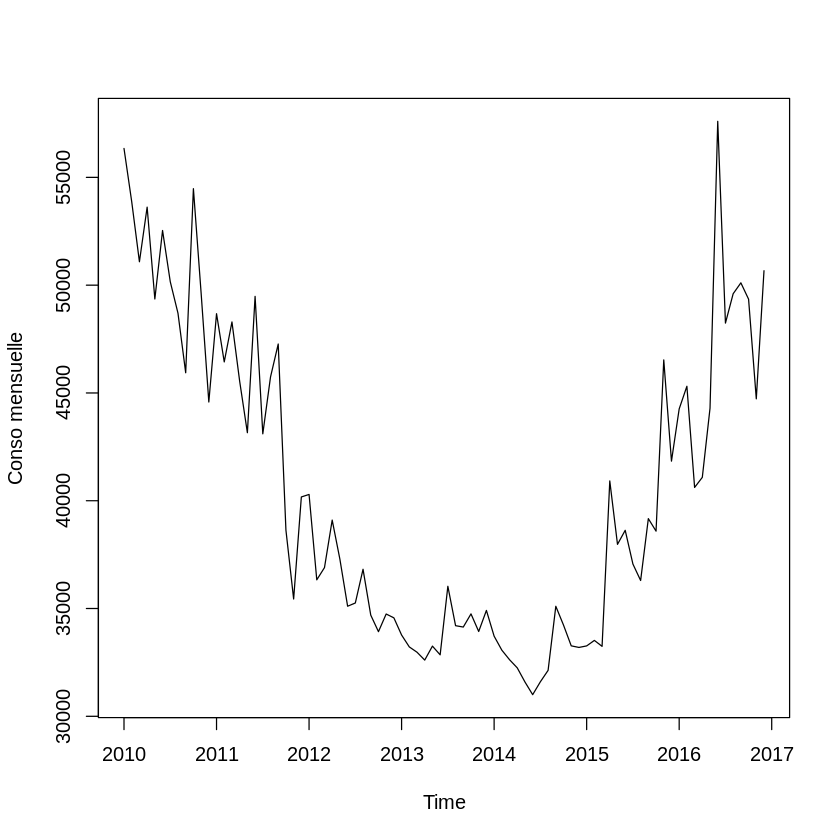

In [18]:
plot(df_energie_ts,ylab='Conso mensuelle')

# Effet meteo dju

In [19]:
df_base_meteo_ts <- ts(as.vector(as.matrix(df_base_meteo[-1])),start=c(2010,1),frequency = 12)
log_df_base_meteo_ts = log(df_base_meteo_ts)

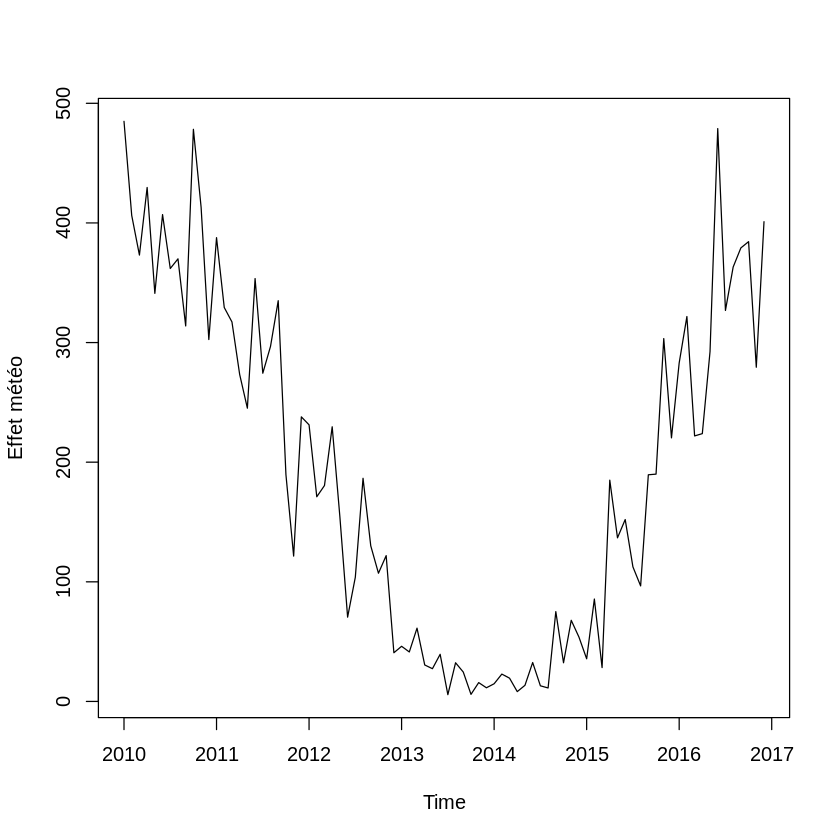

In [20]:
plot(df_base_meteo_ts,ylab='Effet météo')

# Mission 1 : Corrigez les données de consommation mensuelles de l'effet température (dues au chauffage électrique) en utilisant une régression linéaire.

Comment pondérer les consommations en fonction du climat ?

La correction climatique consiste à pondérer les consommations de chauffage sur la base des données climatiques annuelles de la station météo. L’objectif est de rendre les années comparables entre elle, quelle qu’ait été la rudesse de l’hiver. En ramenant les consommations de chauffage à un climat de référence, caractérisé par les DJU, on supprime ainsi les variations imputables à la rigueur climatique.

Consommations corrigées = consommations x (DJU de référence/DJU de la période de consommation considérée)

http://www.gpso-energie.fr/conseils/analyser-ses-consommations-dju

In [21]:
## Il faut décomposer la tendance et l'effet météo dans des bases que l'on pourra estimer par régression lin

# Création de la base tendancielle et saisonnière
## Base tendancielle 
t=1:84




In [25]:
## Base saisonnière
### On va crée 12 indicatrices qui vont contenir des 1 sur chacun des mois

for (i in 1:12)
{
  su=rep(0,times=12)
  su[i]=1
  s=rep(su,times=7)
  assign(paste("s",i,sep=""),s)
}



In [28]:
# On effectue la régression linéaire (le modèle a été transformé afin de palier au prob de colinéarité) sur la série Yt
## Note : Colinéarité = En algèbre linéaire, deux vecteurs u et v d'un espace vectoriel E sont colinéaires s'il existe un scalaire k tel que u = kv ou v = ku. 
reg=lm(log_df_energie_ts~t+s1+s2+s3+s4+s5+s6+s7+s8+s9+s10+s11+s12-1)
summary(reg)

## Affichage des coefficients
reg$coefficients

## Coefficients initiaux
a=mean(reg$coefficients[2:13])
b=reg$coefficients[1]
c=reg$coefficients[2:13]-mean(reg$coefficients[2:13])




Call:
lm(formula = log_df_energie_ts ~ t + s1 + s2 + s3 + s4 + s5 + 
    s6 + s7 + s8 + s9 + s10 + s11 + s12 - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26532 -0.15113 -0.03171  0.13843  0.39953 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
t   -0.001893   0.000819  -2.312   0.0237 *  
s1  10.684244   0.074527 143.361   <2e-16 ***
s2  10.657544   0.074864 142.359   <2e-16 ***
s3  10.639860   0.075208 141.473   <2e-16 ***
s4  10.676624   0.075559 141.301   <2e-16 ***
s5  10.652159   0.075918 140.311   <2e-16 ***
s6  10.709435   0.076284 140.389   <2e-16 ***
s7  10.670311   0.076657 139.196   <2e-16 ***
s8  10.678598   0.077036 138.618   <2e-16 ***
s9  10.693051   0.077423 138.113   <2e-16 ***
s10 10.681912   0.077816 137.272   <2e-16 ***
s11 10.666821   0.078216 136.377   <2e-16 ***
s12 10.676895   0.078622 135.801   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1801 on 71 degrees of freed

t           s1           s2           s3           s4           s5 
-0.001893397 10.684243943 10.657544392 10.639859796 10.676624009 10.652158953 
          s6           s7           s8           s9          s10          s11 
10.709434618 10.670311064 10.678597486 10.693050763 10.681912056 10.666820579 
         s12 
10.676895436

cem = Correction Effet météo

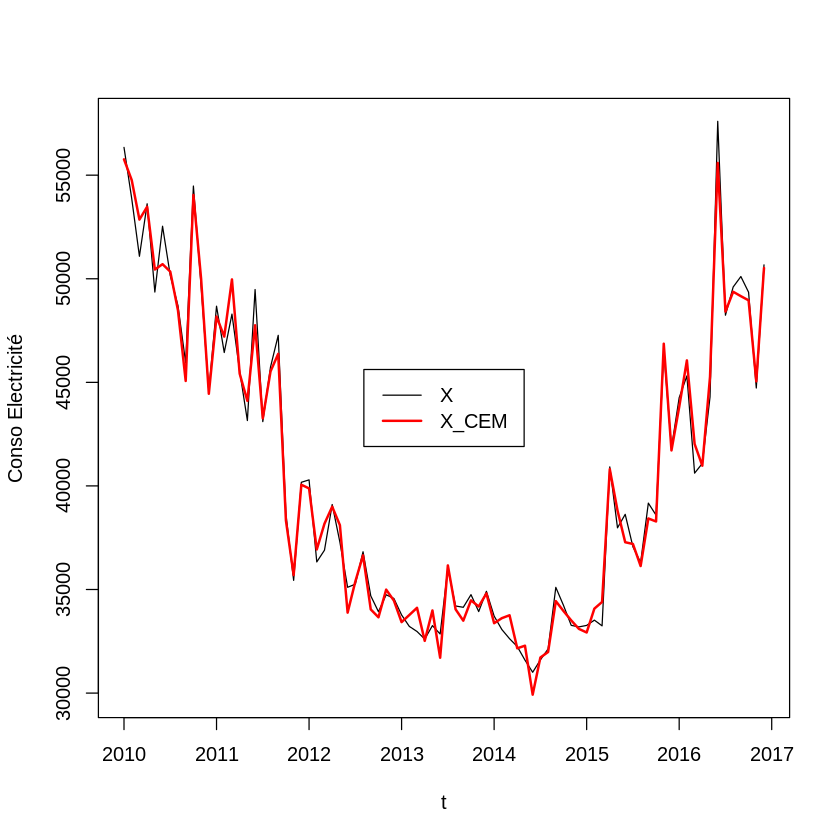

In [32]:
# On calcule la série corrigée de l'effet météo (en n'oubliant pas de passer à l'exponentiel pour revenir à Xt)
log_df_energie_ts_cem=log_df_energie_ts-(c[1]*s1+c[2]*s2+c[3]*s3+c[4]*s4+c[5]*s5+c[6]*s6+c[7]*s7+c[8]*s8+c[9]*s9+c[10]*s10+c[11]*s11+c[12]*s12)

df_energie_ts_cem=exp(log_df_energie_ts_cem)

ts.plot(df_energie_ts,df_energie_ts_cem,xlab='t',ylab='Conso Electricité',col=c(1,2),lwd=c(1,2))
legend('center',legend=c("X","X_CEM"),col=c(1,2),lwd=c(1,2))

# Mission 2 : Effectuez une désaisonnalisation de la consommation que vous aurez obtenue après correction, grâce aux moyennes mobiles.

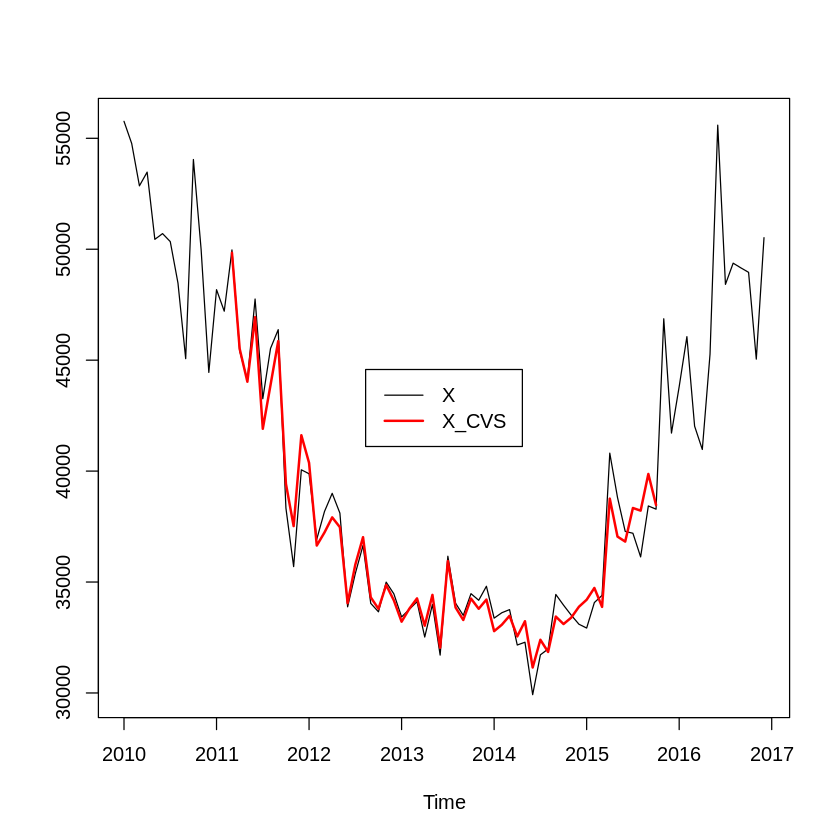

In [39]:
# Désaisonnaliser une série temporelle à l'aide des moyennes mobile (alogrithme x11)
# Il y a deux phases de 4 étapes. Chaque phase donne une St corrigée.

## Etape 1 : Primo-estimation de la tendance
m2_12=function(x){
  y=(1/12)*stats::filter(x,c(0.5,rep(1,times=11),0.5))
  return(y)
}
t1=m2_12(log_df_energie_ts_cem)

## Primo-estimation de la somme composante saisonnière-perturbation
sig1=log_df_energie_ts_cem-t1

## Primo-estimation de la composante saisonnière
m3=function(x){
  
  y=(1/3)*stats::filter(x,rep(1,times=3))
  
  return(y)
  
}
s1=m3(m3(sig1))
shat1=s1-m2_12(s1)
## Primo-estimation de la série corrigée des variations saisonnières
log_df_energie_ts_cem_cvs1=log_df_energie_ts_cem-shat1
df_energie_ts_cem_cvs1=exp(log_df_energie_ts_cem_cvs1)

ts.plot(df_energie_ts_cem,df_energie_ts_cem_cvs1,col=c(1,2),lwd=c(1,2))

legend("center",legend=c("X","X_CVS"),col=c(1,2),lwd=c(1,2))




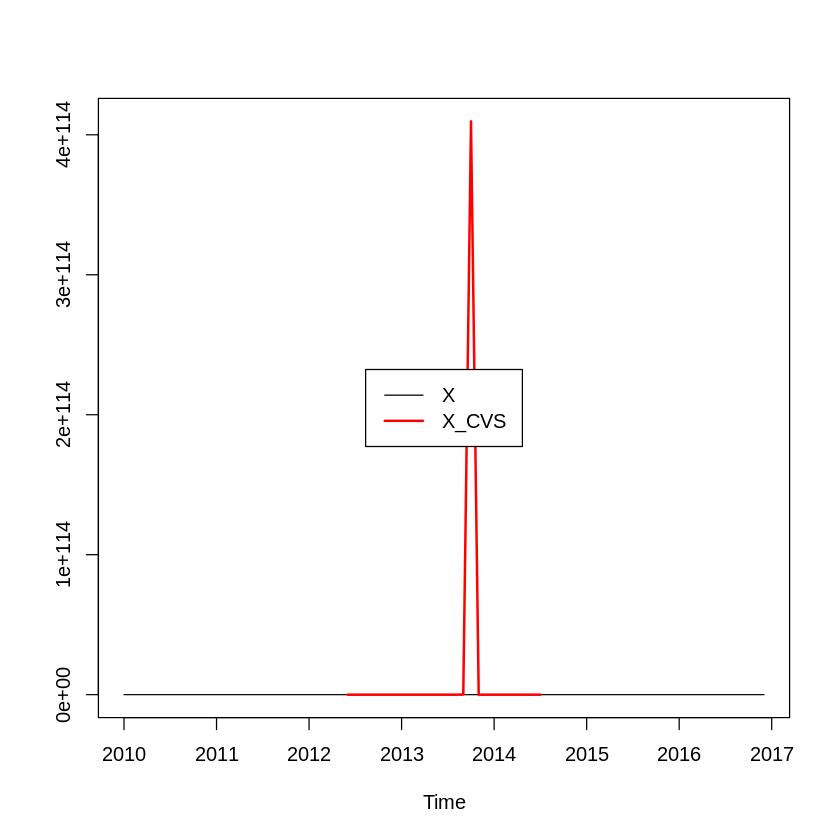

In [41]:
# Fin de la phase 1 et debut de la phase 2
## Etape 1 : Estimation définitive de la tendance
m13h=function(x){
  
  y=(1/16796)*stats::filter(x,c(-325,-468,0,1100,2475,3600,4032,3600,2475,1100,0,-468,-325))
  
  return(y)
  
}

t2=m13h(df_energie_ts_cem_cvs1)
## Etape 2 : Estimation définitive de la somme composante saisonnière-perturbation (2)
sig2=log_df_energie_ts_cem-t2

## Etape 3 : Estimation définitive de la composante saisonnière
m5=function(x){
  y=(1/5)*stats::filter(x,rep(1,times=5))
  return(y)
}
s2=m3(m5(sig2))
shat2=s2-m2_12(s2)

## Estimation définitive de la série corrigée des variations saisonnières
log_df_energie_ts_cem_cvs2=log_df_energie_ts_cem-shat2
df_energie_ts_cem_cvs2=exp(log_df_energie_ts_cem_cvs2)

ts.plot(df_energie_ts_cem,df_energie_ts_cem_cvs2,col=c(1,2),lwd=c(1,2))

legend("center",legend=c("X","X_CVS"),col=c(1,2),lwd=c(1,2))

# Mission 3 : Effectuez une prévision de la consommation (corrigée de l'effet température) sur un an, en utilisant la méthode de Holt Winters (lissage exponentiel) puis la méthode ARMA sur la série temporelle désaisonnalisée.

## Prévision de la consommation (corrigée de l'effet température) sur un an, en utilisant la méthode de Holt Winters (lissage exponentiel) 

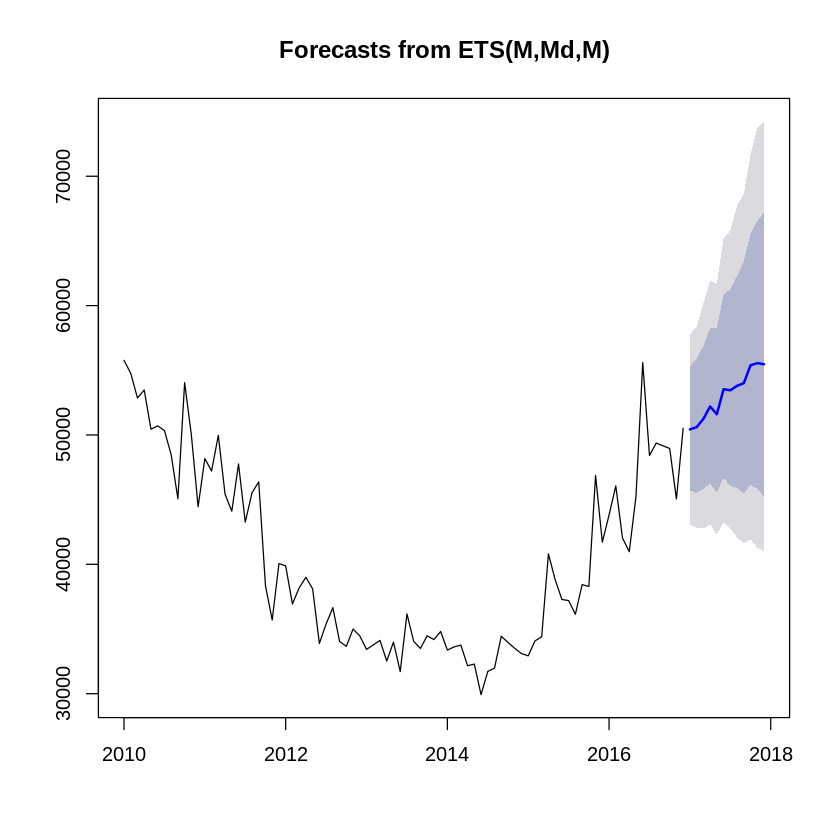

In [46]:
# Lissage holt-winters :
hw=ets(df_energie_ts_cem,model="MMM")
hw.pred=predict(hw,12)
plot(hw.pred)

## Prédiction avec la méthode ARMA sur la série temporelle désaisonnalisée.

Seuil = 5% <br/>
On désigne par Xt  la série conso électricité, et on considère Yt=ln(Xt) <br/>
On travaille en effet sur le logarithme de la série afin de pallier l’accroissement de la saisonnalité. <br/>
On passe ainsi d’un modèle multiplicatif à un modèle additif.

In [59]:
df_energie_ts_cem_cvs2 <- na.remove(df_energie_ts_cem_cvs2)

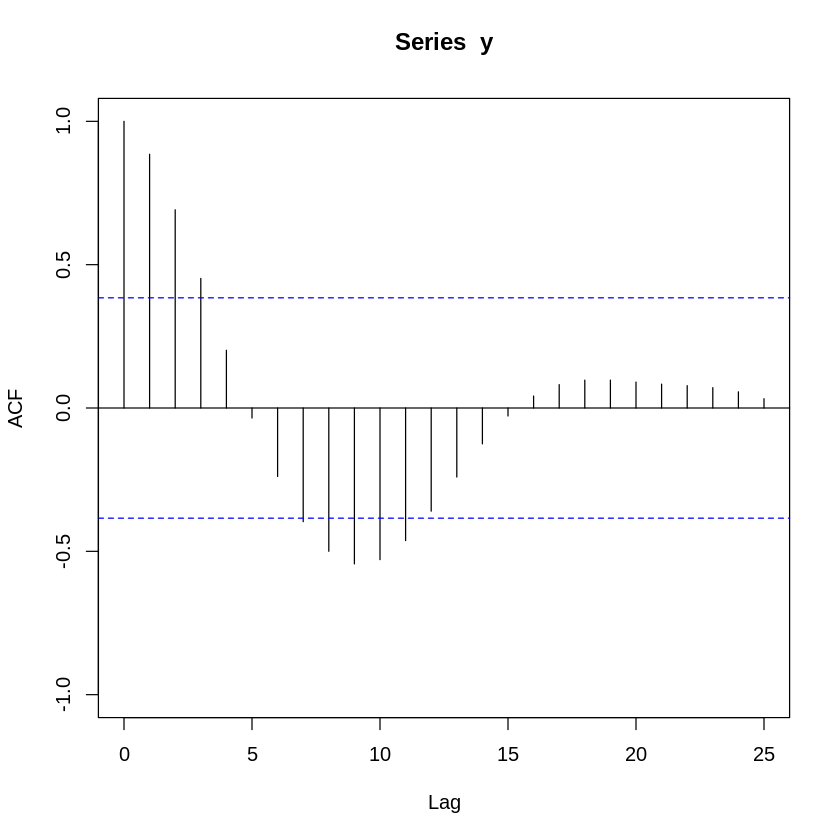

In [60]:
x=df_energie_ts_cem_cvs2
y=log(x)

plot(acf(y,lag.max = 36,plot=FALSE),ylim = c(-1,1))



La sortie ACF présente une décroissance rapide vers -0.5 et ensuite croit rapidement vers 0, ce qui traduit un problème de non-stationnarité.


In [ ]:
#On effectue donc une différenciation (I−B) .

y_dif1=diff(y,lag=1,differences = 1)
plot(acf(y_dif1,lag.max = 36,plot=FALSE),ylim=c(-1,1))

#  La sortie ACF de la série ainsi différenciée présente encore une décroissance lente vers 0 pour les multiples de 12.
# On effectue cette fois la différenciation (I−B^12) .

y_dif_1_12=diff(y_dif1,lag=12,differences=1)

plot(acf(y_dif_1_12,lag.max=36,plot=FALSE),ylim=c(-1,1))

# La sortiE ACF de la série doublement différenciée semble 
#pouvoir être interprétée comme un autocorrélogramme simple empirique.
#On identifiera donc un modèle ARMA sur la série  (I−B)(I−B12)ln(Xt) .

# Identification, estimation et validation de modèles
# On s'appuie sur les corrélogrammes simples et partiels estimés

#simple
y_dif_1_12=diff(y_dif1,lag=12,differences=1)
plot(acf(y_dif_1_12,lag.max=36,plot=FALSE),ylim=c(-1,1))

#partiel
plot(pacf(y_dif_1_12,lag.max=36,plot=FALSE),ylim=c(-1,1))

# Modèle 1
#On estime en premier lieu un modèle SARIMA(1,1,1)(1,1,1)12  
#au vu des autocorrélogrammes empiriques simples et partiels. 
#Ce modèle s’écrit : (I−φ1B)(I−φ′1B12)(I−B)(I−B12)ln(Xt)=(I+θ1B)(I+θ′1B12)εt 

model1=Arima(y,order=c(1,1,1),seasonal = list(order=c(1,1,1),period=12),include.mean = FALSE,method = "CSS-ML")
summary(model1)

t_stat(model1)

Box.test.2(model1$residuals,nlag = c(6,12,18,24,30,36),type="Ljung-Box",decim=5)

#Ce modèle ayant des paramètres non significatifs, on en teste un second.

# Modele 2 :
#(I−φ′1B12)(I−B)(I−B12)ln(Xt)=(I+θ1B)(I+θ′1B12)εt 

model2=Arima(y,order=c(1,1,1),seasonal = list(order=c(0,1,1),period=12),include.mean = FALSE,method = "CSS-ML")
summary(model2)

t_stat(model2)

Box.test.2(model2$residuals,nlag = c(6,12,18,24,30,36),type="Ljung-Box",decim=5)

#Ce modèle ayant des paramètres non significatifs, on en teste un troisième.
#(I−B)(I−B12)ln(Xt)=(I+θ1B)(I+θ′1B12)εt .

model3=Arima(y,order=c(0,1,1),seasonal = list(order=c(0,1,1),period=12),include.mean = FALSE,method = "CSS-ML")
summary(model3)

t_stat(model3)

Box.test.2(model3$residuals,nlag = c(6,12,18,24,30,36),type="Ljung-Box",decim=5)

#Les tests de significativité des paramètres et de blancheur du résidu sont validés au niveau 5%.

shapiro.test(model3$residuals)

# Le test de normalité est également validé pour ce modèle.
pred_model3=forecast(model3,h=12,level=95)
pred=exp(pred_model3$mean)
pred_l=ts(exp(pred_model3$lower),start=c(1961,1),frequency=12)
pred_u=ts(exp(pred_model3$upper),start=c(1961,1),frequency=12)
ts.plot(x,pred,pred_l,pred_u,xlab="t",ylab="Airpass",col=c(1,2,3,3),lty=c(1,1,2,2),lwd=c(1,3,2,2))

ts.plot(window(x,start=c(1960,1)),pred,pred_l,pred_u,xlab="t",ylab="Airpass",col=c(1,2,3,3),lty=c(1,1,2,2),lwd=c(1,3,2,2))

# Analyse a posteriori
#On tronque la série de l’année 1960, qu’on cherche ensuite à prévoir à partir de l’historique 1949-1959.

x_tronc=window(x,end=c(1959,12))
y_tronc=log(x_tronc)
x_a_prevoir=window(x,start=c(1960,1))

#On vérifie que le modèle 3 sur la série tronquée est toujours validé.
model3tronc=Arima(y_tronc,order=c(0,1,1),list(order=c(0,1,1),period=12),include.mean=FALSE,method="CSS-ML")
summary(model3tronc)

t_stat(model3tronc)
Box.test.2(model3tronc$residuals,nlag=c(6,12,18,24,30,36),type="Ljung-Box",decim=5)
shapiro.test(model3tronc$residuals)

#On constate que la réalisation 1960 est dans l’intervalle de prévision à 95% (basé sur les données antérieures à 1959).

pred_model3tronc=forecast(model3tronc,h=12,level=95)
pred_tronc=exp(pred_model3tronc$mean)
pred_l_tronc=ts(exp(pred_model3tronc$lower),start=c(1960,1),frequency=12)
pred_u_tronc=ts(exp(pred_model3tronc$upper),start=c(1960,1),frequency=12)
ts.plot(x_a_prevoir,pred_tronc,pred_l_tronc,pred_u_tronc,xlab="t",ylab="Airpass",col=c(1,2,3,3),lty=c(1,1,2,2),lwd=c(3,3,2,2))
legend("topleft",legend=c("X","X_prev"),col=c(1,2,3,3),lty=c(1,1),lwd=c(3,3))
legend("topright",legend=c("int95%_inf","int95%_sup"),col=c(3,3),lty=c(2,2),lwd=c(2,2))

#On calcule les RMSE et MAPE.
rmse=sqrt(mean((x_a_prevoir-pred_tronc)^2))
rmse

mape=mean(abs(1-pred_tronc/x_a_prevoir))*100
mape

#L’interprétation des critères d’erreur dépend de la série et 
#de la qualité de prévision exigée. Dans le cas présent, un MAPE de 2.9% semble satisfaisant a priori.